# **Importing Libraries**

In [849]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as ss
from plotly.offline import iplot
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, label_binarize, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import plotly.express as px
import math
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
from prophet import Prophet

# **Data Loading and Exploration**

In [850]:
data = pd.read_excel('maize_prices_19_23.xlsx')
data.describe()

,Date,Year,Date.1,Minimum,Maximum,Average
count,9514.000000,9514.000000,9514,9514.000000,9514.000000,9514.000000
mean,15.559386,2020.834139,2021-04-17 08:19:28.467521792,2452.600347,2899.098707,3073.812503
min,1.000000,2019.000000,2019-01-01 00:00:00,850.000000,1300.000000,1262.500000
25%,8.000000,2020.000000,2020-03-11 00:00:00,2050.000000,2250.000000,2475.000000
50%,15.000000,2021.000000,2021-04-29 00:00:00,2500.000000,2925.000000,2931.250000
75%,23.000000,2022.000000,2022-03-01 18:00:00,2875.000000,3500.000000,3637.500000
max,31.000000,2023.000000,2023-12-27 00:00:00,3800.000000,4875.000000,8850.000000
std,8.670541,1.233331,NaN,621.349600,794.879029,914.153124


In [851]:
data.shape

(9514, 8)

In [852]:
data.head(5)

,Month,Date,Year,Date.1,stations,Minimum,Maximum,Average
0,Jan,1,2019,2019-01-01,Dunyapur,2000.0,2500.0,2250.0
1,Jan,1,2019,2019-01-01,Kahror Pacca,2000.0,2500.0,2250.0
2,Jan,1,2019,2019-01-01,Khanewal,2000.0,2750.0,2375.0
3,Jan,1,2019,2019-01-01,Hasilpur,2500.0,2750.0,2625.0
4,Jan,1,2019,2019-01-01,Bahawalnagar,2250.0,3125.0,2687.5


In [853]:
data.dtypes

Month               object
Date                 int64
Year                 int64
Date.1      datetime64[ns]
stations            object
Minimum            float64
Maximum            float64
Average            float64
dtype: object

# **Data Cleaning**

## **a) Missing Values**

In [854]:
data.isna().sum()

Month       0
Date        0
Year        0
Date.1      0
stations    0
Minimum     0
Maximum     0
Average     0
dtype: int64

In [855]:
data.nunique()

Month         12
Date          31
Year           5
Date.1      1125
stations      53
Minimum      237
Maximum      525
Average     1021
dtype: int64

In [856]:
# print all stations
data['stations'].unique()

array(['Dunyapur', 'Kahror Pacca', 'Khanewal', 'Hasilpur', 'Bahawalnagar',
       'Chichawatni', 'Burewala', 'Arifwala', 'Chishtian', 'Sahiwal',
       'Mian Channu', 'Pakpattan', 'Okara', 'Pattoki', 'Shujabad',
       'Kasur', 'Tobe Tek Singh', 'Samundari', 'Gujrat', 'Vehari',
       'Kamalia', 'Layyah', 'Jauhrabad', 'Bhakkar', 'Dera Ghazi Khan',
       'Rawalpindi', 'Multan', 'Faisalabad', 'Lala Musa', 'Chakwal',
       'Jhelum', 'Sialkot', 'Jalalpur Jattan', 'Hazro', 'Sargodha',
       'Mianwali', 'Gujranwala', 'Nowhera Virkan', 'Wazirabad',
       'Haroonabad', 'Pak Pattan', 'Dipalpur', 'C.Watni', 'Arif Wala',
       'Duniyapur', 'Depalpur', 'Toba Tek Singh', 'Khairpur', 'Pak Patan',
       'Mian Chanu', 'Mailsi', 'Kehror Pakka', 'Kehror Paka'],
      dtype=object)

In [857]:
name_mapping = {
  'Dunyapur': 'Dunyapur', 'Duniyapur': 'Dunyapur',
  'Kahror Pacca': 'Kahror Pacca', 'Kehror Pakka': 'Kahror Pacca', 'Kehror Paka': 'Kahror Pacca',
  'Khanewal': 'Khanewal',
  'Hasilpur': 'Hasilpur',
  'Bahawalnagar': 'Bahawalnagar',
  'Chichawatni': 'Chichawatni', 'C.Watni': 'Chichawatni',
  'Burewala': 'Burewala',
  'Arifwala': 'Arifwala', 'Arif Wala': 'Arifwala',
  'Chishtian': 'Chishtian',
  'Sahiwal': 'Sahiwal',
  'Mian Channu': 'Mian Channu', 'Mian Chanu': 'Mian Channu',
  'Pakpattan': 'Pakpattan', 'Pak Pattan': 'Pakpattan', 'Pak Patan': 'Pakpattan',
  'Okara': 'Okara',
  'Pattoki': 'Pattoki',
  'Shujabad': 'Shujabad',
  'Kasur': 'Kasur',
  'Toba Tek Singh': 'Toba Tek Singh', 'Tobe Tek Singh': 'Toba Tek Singh',
  'Samundari': 'Samundari',
  'Gujrat': 'Gujrat',
  'Vehari': 'Vehari',
  'Kamalia': 'Kamalia',
  'Layyah': 'Layyah',
  'Jauhrabad': 'Jauhrabad',
  'Bhakkar': 'Bhakkar',
  'Dera Ghazi Khan': 'Dera Ghazi Khan',
  'Rawalpindi': 'Rawalpindi',
  'Multan': 'Multan',
  'Faisalabad': 'Faisalabad',
  'Lala Musa': 'Lala Musa',
  'Chakwal': 'Chakwal',
  'Jhelum': 'Jhelum',
  'Sialkot': 'Sialkot',
  'Jalalpur Jattan': 'Jalalpur Jattan',
  'Hazro': 'Hazro',
  'Sargodha': 'Sargodha',
  'Mianwali': 'Mianwali',
  'Gujranwala': 'Gujranwala',
  'Nowhera Virkan': 'Nowhera Virkan',
  'Wazirabad': 'Wazirabad',
  'Haroonabad': 'Haroonabad',
  'Dipalpur': 'Dipalpur', 'Depalpur': 'Dipalpur',
  'Khairpur': 'Khairpur',
  'Mailsi': 'Mailsi',
  'Hafizabad': 'Hafizabad',
  'Gojra': 'Gojra',
  'Rahim Yar Khan': 'Rahim Yar Khan',
  'Chowk Azam': 'Chowk Azam',
  'Bahawalpur': 'Bahawalpur',
  'Lodhran': 'Lodhran',
  'Sadiqabad': 'Sadiqabad',
  'Toba Tek Singh': 'Toba Tek Singh'
}


data['stations'] = data['stations'].map(name_mapping)

In [858]:
data.nunique()

Month         12
Date          31
Year           5
Date.1      1125
stations      43
Minimum      237
Maximum      525
Average     1021
dtype: int64

## **b) Removing Duplicates**

In [859]:
data.duplicated().sum()

0

In [860]:
data.drop_duplicates(inplace=True)

## **c) Removing Inconsistencies**

In [861]:
data['Month'] = data['Month'].astype('category')

data['Date.1'] = pd.to_datetime(data['Date.1'])

data['stations'] = data['stations'].astype('category')

In [862]:
data['Average'] = (data['Minimum'] + data['Maximum']) / 2

In [863]:
# swap minimum and maximum values if minimum is greater than maximum
data.loc[data['Minimum'] > data['Maximum'], ['Minimum', 'Maximum']] = data.loc[data['Minimum'] > data['Maximum'], ['Maximum', 'Minimum']].values

In [864]:
data.describe()

,Date,Year,Date.1,Minimum,Maximum,Average
count,9514.000000,9514.000000,9514,9514.000000,9514.000000,9514.000000
mean,15.559386,2020.834139,2021-04-17 08:19:28.467521792,2452.600347,2899.098707,2675.849527
min,1.000000,2019.000000,2019-01-01 00:00:00,850.000000,1300.000000,1262.500000
25%,8.000000,2020.000000,2020-03-11 00:00:00,2050.000000,2250.000000,2188.125000
50%,15.000000,2021.000000,2021-04-29 00:00:00,2500.000000,2925.000000,2694.500000
75%,23.000000,2022.000000,2022-03-01 18:00:00,2875.000000,3500.000000,3250.000000
max,31.000000,2023.000000,2023-12-27 00:00:00,3800.000000,4875.000000,3900.000000
std,8.670541,1.233331,NaN,621.349600,794.879029,692.621074


## **c) Outlier**

In [865]:
def remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 0.9 * IQR
  upper_bound = Q3 + 0.9 * IQR
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [866]:
filtered_data_min = remove_outliers(data, 'Minimum')
filtered_data_max = remove_outliers(filtered_data_min, 'Maximum')
filtered_data_avg = remove_outliers(filtered_data_max, 'Average')

print(f"Original data shape: {data.shape}")
print(f"Data shape after removing outliers from all three columns: {filtered_data_avg.shape}")


Original data shape: (9514, 8)
Data shape after removing outliers from all three columns: (8991, 8)


In [867]:
data = filtered_data_avg

# **Line Graph**

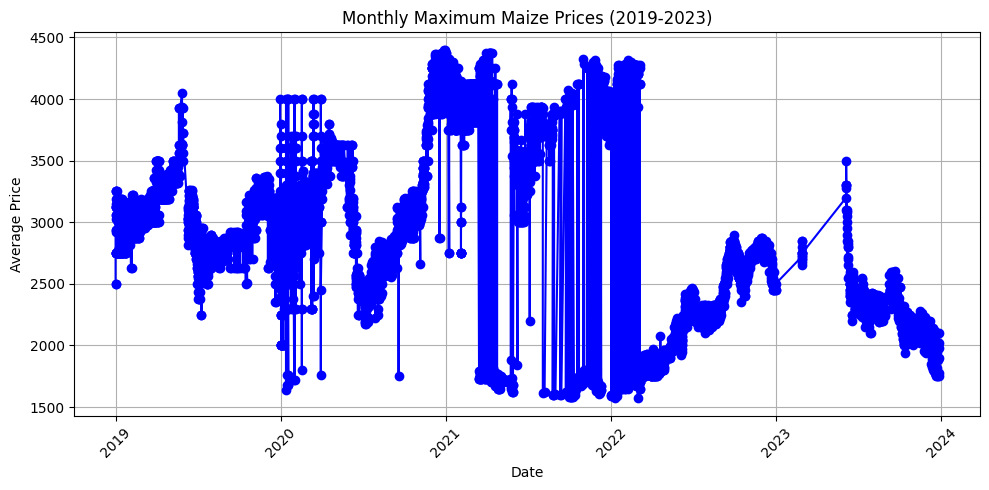

In [868]:
data.sort_values('Date.1', inplace=True)

# Creating the line graph
plt.figure(figsize=(10, 5))  # Set the figure size for better readability
plt.plot(data['Date.1'], data['Maximum'], marker='o', linestyle='-', color='b')  # Plot line

# Enhancing the graph
plt.title('Monthly Maximum Maize Prices (2019-2023)')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(True)  # Add a grid for easier reference

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


/var/folders/hq/f1f9rdc54j7957q7yl8hsy7r0000gn/T/ipykernel_19175/4116654956.py:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



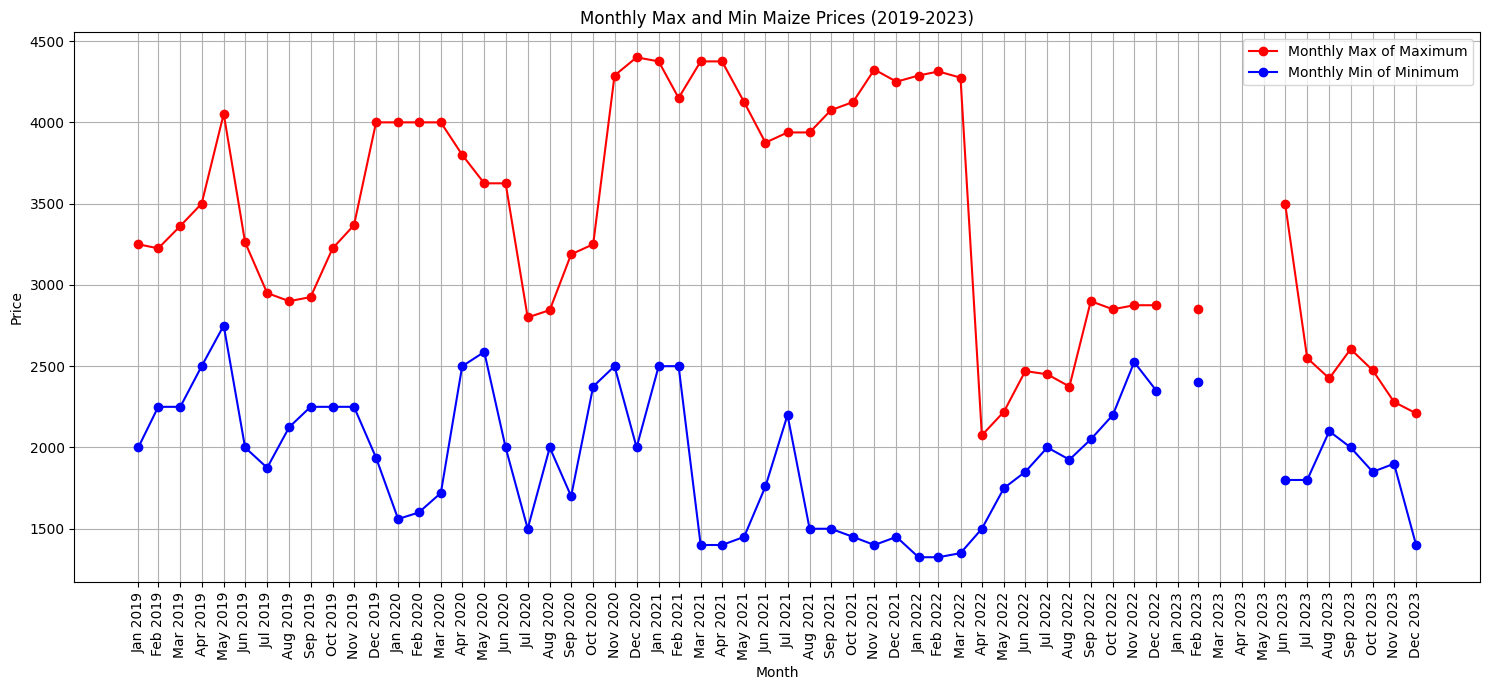

In [869]:
data['Date.1'] = pd.to_datetime(data['Date.1'])

# Set 'Date.1' as the index
data.set_index('Date.1', inplace=True)

# Resample data by month and calculate max of maximum and min of minimum
monthly_max = data['Maximum'].resample('ME').max()
monthly_min = data['Minimum'].resample('M').min()

# Reset index to use in plotting
monthly_max = monthly_max.reset_index()
monthly_min = monthly_min.reset_index()

# Creating the plot
plt.figure(figsize=(15, 7))  # Set the figure size for better readability
plt.plot(monthly_max['Date.1'], monthly_max['Maximum'], label='Monthly Max of Maximum', color='red', marker='o')
plt.plot(monthly_min['Date.1'], monthly_min['Minimum'], label='Monthly Min of Minimum', color='blue', marker='o')

# Enhancing the graph
plt.title('Monthly Max and Min Maize Prices (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(monthly_max['Date.1'], monthly_max['Date.1'].dt.strftime('%b %Y'), rotation=90)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [870]:
# get the minimum value for minimum column for March 2020 and change it to 1600
data.loc[(data.index.month == 3) & (data.index.year == 2020), 'Minimum'] = 1600

# get the maximum value for maximum column for Feb 2021 and change it to 4600
data.loc[(data.index.month == 2) & (data.index.year == 2021), 'Maximum'] = 4600

# get the minimum value for minimum column for Jan 2022 and change it to 1300
data.loc[(data.index.month == 1) & (data.index.year == 2022), 'Minimum'] = 1300

# get the maximum value for maximum column for April 2022 and change it to 4400
data.loc[(data.index.month == 4) & (data.index.year == 2022), 'Maximum'] = 4300

# get the maximum value for maximum column for June 2023 and change it to 2900
data.loc[(data.index.month == 6) & (data.index.year == 2023), 'Maximum'] = 2900

# get the minimum value for minimum column for July 2021 and change it to 1800
data.loc[(data.index.month == 7) & (data.index.year == 2021), 'Minimum'] = 1800

# get the maximum value for maximum column for May 2019 and change it to 3600
data.loc[(data.index.month == 5) & (data.index.year == 2019), 'Maximum'] = 3600

# get the minimum value for minimum column for Sept 2020 and change it to 2600
data.loc[(data.index.month == 9) & (data.index.year == 2020), 'Minimum'] = 2000

/var/folders/hq/f1f9rdc54j7957q7yl8hsy7r0000gn/T/ipykernel_19175/2659350385.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



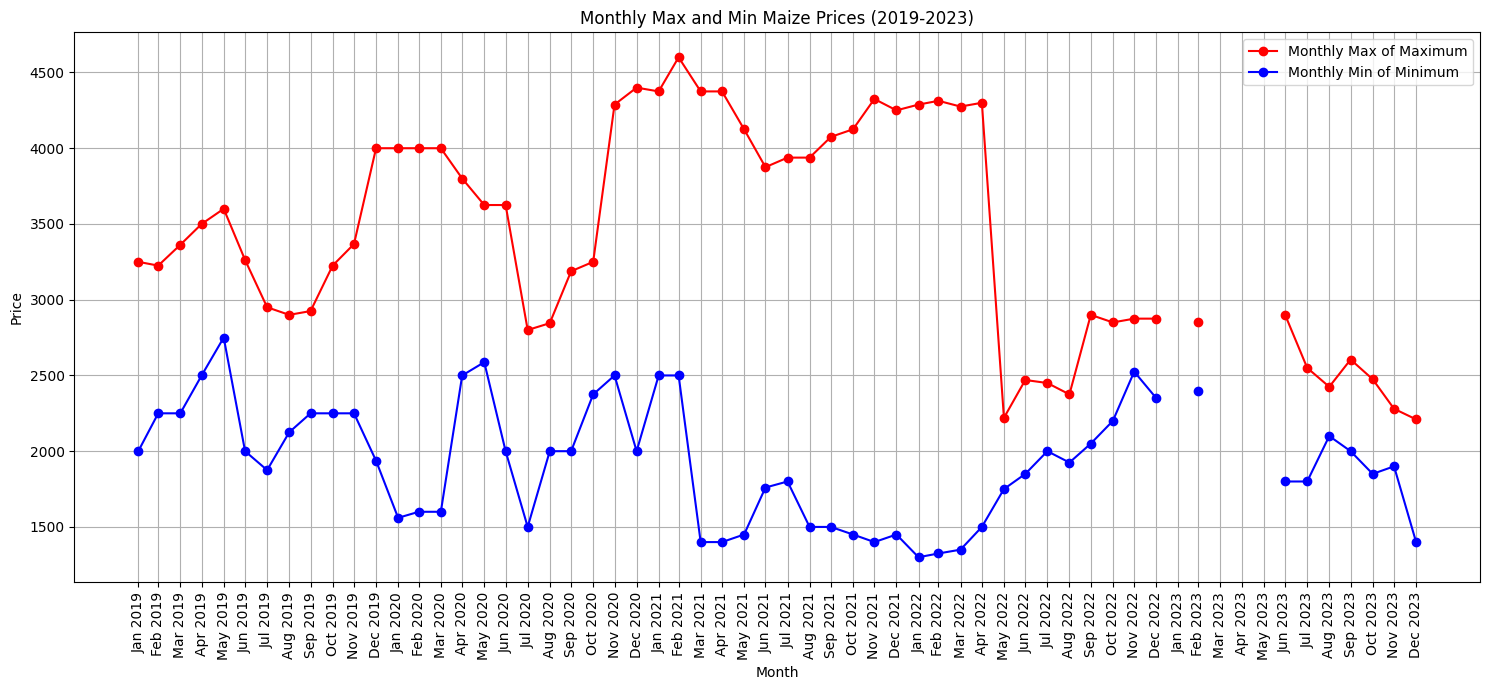

In [871]:
# Ensure 'Date.1' is a datetime typ

# Resample data by month and calculate max of maximum and min of minimum
monthly_max = data['Maximum'].resample('ME').max()
monthly_min = data['Minimum'].resample('M').min()

# Reset index to use in plotting
monthly_max = monthly_max.reset_index()
monthly_min = monthly_min.reset_index()

# Creating the plot
plt.figure(figsize=(15, 7))  # Set the figure size for better readability
plt.plot(monthly_max['Date.1'], monthly_max['Maximum'], label='Monthly Max of Maximum', color='red', marker='o')
plt.plot(monthly_min['Date.1'], monthly_min['Minimum'], label='Monthly Min of Minimum', color='blue', marker='o')

# Enhancing the graph
plt.title('Monthly Max and Min Maize Prices (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(monthly_max['Date.1'], monthly_max['Date.1'].dt.strftime('%b %Y'), rotation=90)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [872]:
data.describe()

,Date,Year,Minimum,Maximum,Average
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,15.619508,2020.809142,2311.958058,2965.856812,2652.097776
std,8.645042,1.257878,574.661654,815.451838,654.602442
min,1.000000,2019.000000,1300.000000,1570.000000,1485.000000
25%,8.000000,2020.000000,1875.000000,2311.250000,2197.500000
50%,16.000000,2021.000000,2320.000000,2950.000000,2687.500000
75%,23.000000,2022.000000,2750.000000,3546.500000,3158.250000
max,31.000000,2023.000000,3575.000000,4600.000000,3900.000000
